# PROYECTO DE STROKE - Carlos Gabriel Leguizamon Guillaumet

# Abstracto


https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

- Definicion de objetivo: Clasificacion de si es probable que un paciente sufra un accidente cerebrovascular en función de las variables de entrada

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa de muerte en todo el mundo, responsable de aproximadamente el 11% del total de muertes.
Este conjunto de datos se utiliza para definir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.

Información de atributo

1) id: identificador único

2) gender: "Masculino", "Femenino" u "Otro"

3) age: edad del paciente

4) hipertensión: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión

5) heart_disease: 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca

6) ever_married: "No" o "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Privado" o "Independiente"

8) Residence_type: "Rural" o "Urbano"

9) avg_glucose_level: nivel promedio de glucosa en sangre


10) bmi: índice de masa corporal

11) smoking_status: "anteriormente fumó", "nunca fumó", "fuma"o "Desconocido"*

12) stroke: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no

*Nota: "Desconocido" en smoking_status significa que la información no está disponible para este paciente

In [1]:
#Instalamos todos las bibliotecas que vamos a usar 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [2]:
# realizamos la lectura del dataset desde github
df_stroke = pd.read_csv('https://raw.githubusercontent.com/CarlosLeguiz/StrokePrediction/main/healthcare-dataset-stroke-data.csv')
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# i) EDA - Exploracion de Dataset

In [3]:
df_stroke.dtypes # observamos los tipos de datos que contiene el dataframe, donde podemos ver que los tipo object pertenecen a variables categoricas

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<Axes: >

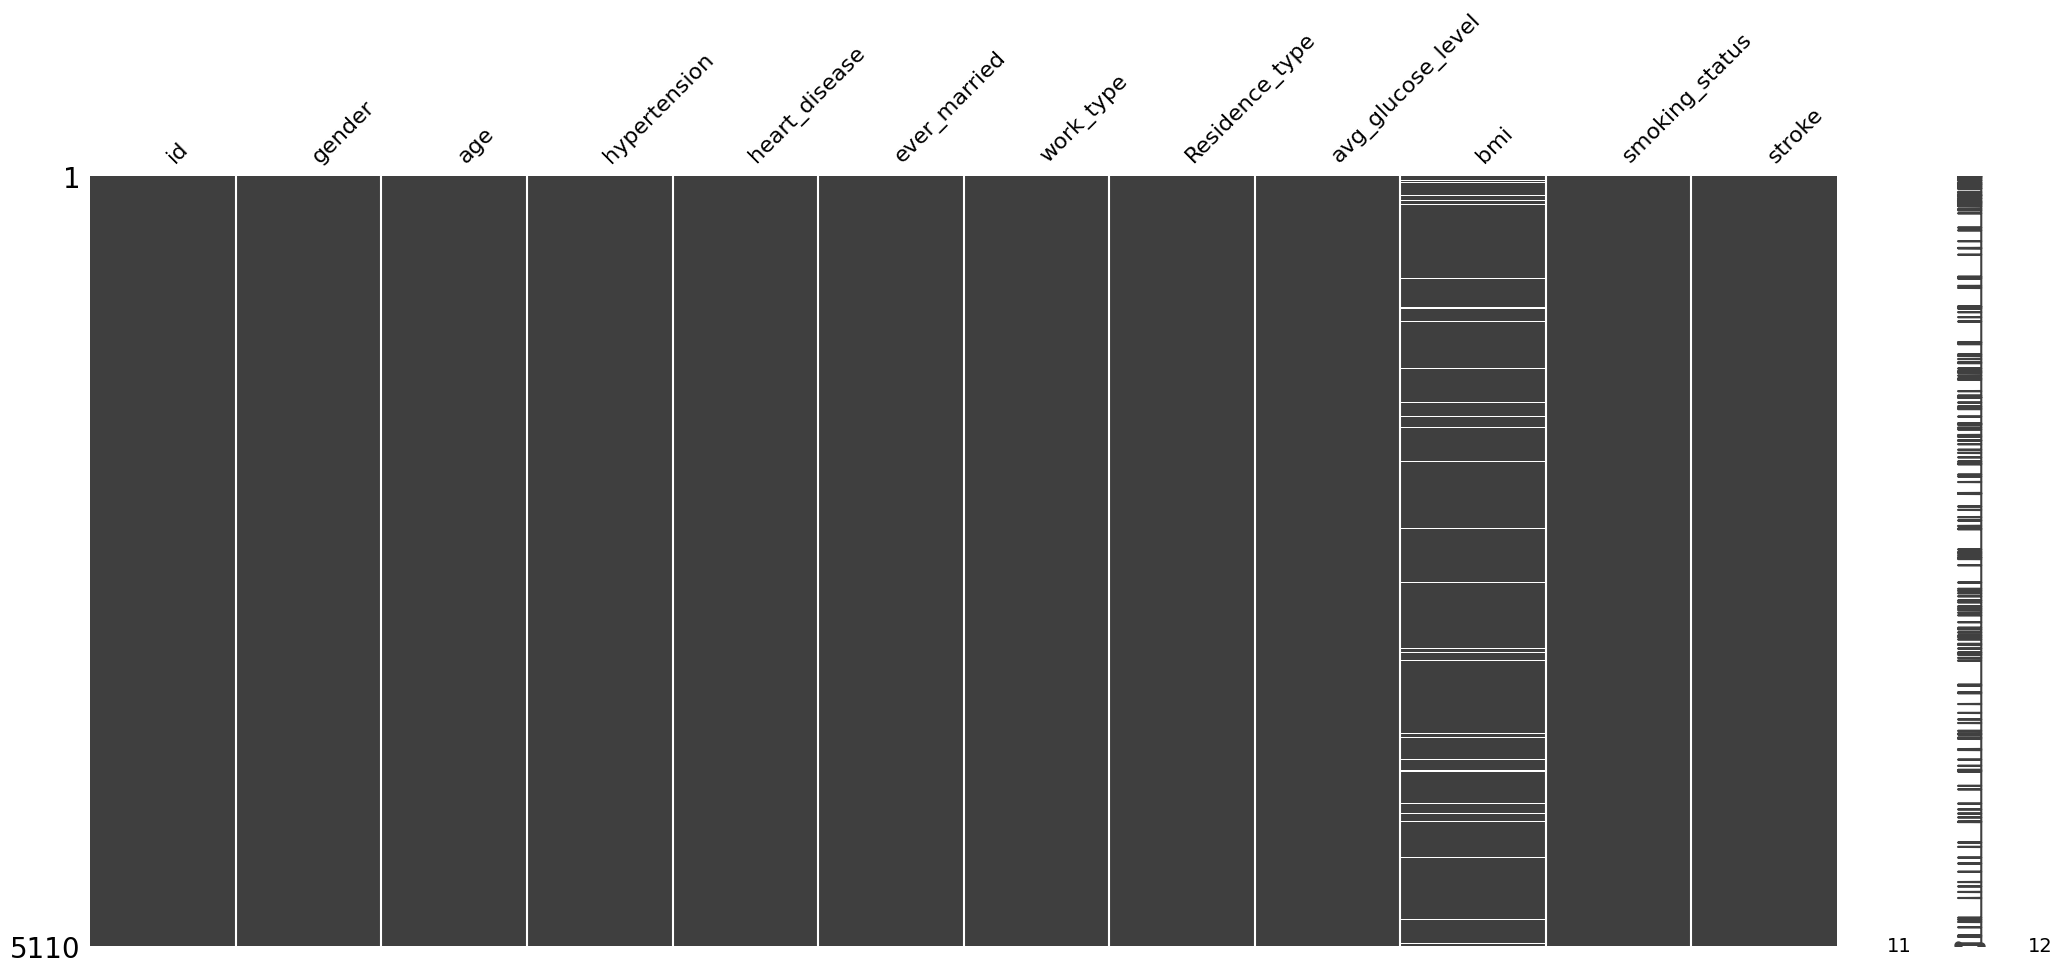

In [4]:
import missingno as msno ##usamos esta biblioteca para identificar cuantos datos faltantes podemos llegar a encontrarnos
msno.matrix(df_stroke)

In [5]:
df = df_stroke.copy() # creamos una copia del dataframe original
df.shape  # obtenenmos la dimension del dataframe que es 5110 filas y 12 columnas

(5110, 12)

In [6]:
df.describe() # comenzamos a analizar los datos de cada variable en este caso veremos el de BMI y asi definir si remplazamos los nan o imputamos con algun valor estadistico

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isna().sum() # obtengo la cantidad de NaN en cada columna y podemos apreciar que el indice de masa corporal tiene 201 nan

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# ii) DataWrangling

In [8]:
df['bmi'].fillna(value=round(df['bmi'].mean(),1), inplace=True) # remplazamos los NaN por el promedio en la variable bmi
df['birth_year'] = (datetime.date.today().year - df.age).astype(int)  # creo una variable derivada de año de nacimiento usando la fecha actual menos la variable age
df['tercera_edad'] = np.where(df['age']>= 60 , 'Yes', 'No') # creamos una variable que indique si el paciente pertenece o no a la tercera edad
df['bmi_descripcion'] =  np.where(df['bmi']<18.5, 'Peso Bajo', # de acuerdo al indice de masa corporal (bmi) se puede clasificar el cuadro de obesidad que tiene el paciente
                                np.where(df['bmi']<24.9, 'Ideal',
                                np.where(df['bmi']<29.9, 'Sobre Peso',
                                np.where(df['bmi']<39.9,  'Obesdad Severa','Obesidad Morbida'))))
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,birth_year,tercera_edad,bmi_descripcion
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1956,Yes,Obesdad Severa
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,1962,Yes,Sobre Peso
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1943,Yes,Obesdad Severa
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1974,No,Obesdad Severa
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1944,Yes,Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.9,never smoked,0,1943,Yes,Sobre Peso
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1942,Yes,Obesidad Morbida
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,1988,No,Obesdad Severa
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1972,No,Sobre Peso


# iii) Preguntas//hipótesis

### A continuacion vamos a analizar datos usando distintas agrupaciones para darnos  una idea de como estan distribuidos los datos

In [9]:
df.groupby(['stroke']).mean() # al ser STROKE mi variable target para Clasificacion procedo a agrupar por esta variable y lo hago obteniendo la media para cada variable

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22228\3578094515.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['stroke']).mean() # al ser STROKE mi variable target para Clasificacion procedo a agrupar por esta variable y lo hago obteniendo la media para cada variable


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,birth_year
stroke,,,,,,,
0,36487.236371,41.971545,0.088871,0.047110,104.795513,28.825612,1981.016869
1,37115.068273,67.728193,0.265060,0.188755,132.544739,30.218876,1955.269076


podemos observar que para el valor de stroke = 1 (que es el evento de ACV) lo siguiente:


*   Tienen mayor edad
*   Mayor valor de hipertension arterial
*   Tienen  enfermedad de corazon
*   Elevado nivel de glucosa
*   Un mayor indice de masa corporal BMI

In [10]:
df.groupby('stroke')["id"].count()  # obtenemos cuantos registros tenemos con pacientes con ACV y podemos definir un radio de casi un 5%

stroke
0    4861
1     249
Name: id, dtype: int64

In [11]:
df.groupby(['stroke','gender', 'ever_married'])["id"].count()  # hacemos una agrupaciion de los pacientes en base a los valores de  Stroke, Genero y Si se han casado

stroke  gender  ever_married
0       Female  No               972
                Yes             1881
        Male    No               755
                Yes             1252
        Other   No                 1
1       Female  No                21
                Yes              120
        Male    No                 8
                Yes              100
Name: id, dtype: int64

In [12]:
df.groupby(['Residence_type'])["id"].count() #obtenemos una agrupacion por el Tipo de Residencia (Rural o Urbano)

Residence_type
Rural    2514
Urban    2596
Name: id, dtype: int64

In [13]:
# hacemos un group by año de nacimiento y contamos la cantidad de pacientes(id) por cada año
df.groupby("birth_year")["id"].count()

birth_year
1941     56
1942     60
1943     70
1944     85
1945    102
       ... 
2018     65
2019     34
2020     46
2021    127
2022     48
Name: id, Length: 82, dtype: int64

In [14]:
df.work_type.value_counts() # obtenemos la cantidad de pacientes en cada tipo de trabajo

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [15]:
df.groupby('work_type')['stroke'].agg(stroke_count='sum', total_count='count') #hacemos una cuenta de cuantos trabajadores de cada tipo tuvieron o no un ataque

,stroke_count,total_count
work_type,,
Govt_job,33,657
Never_worked,0,22
Private,149,2925
Self-employed,65,819
children,2,687


### Hipotesis: Hay una relacion entre nivel de glucosa y que el paciente sufra un episodio de stroke

In [16]:
df.corr() # Hipotesis: Hay una relacion entre nivel de glucosa y que el paciente sufra un episodio de stroke

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22228\3532746781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # Hipotesis: Hay una relacion entre nivel de glucosa y que el paciente sufra un episodio de stroke


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,birth_year
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002977,0.006388,-0.003654
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325956,0.245257,-0.999994
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160205,0.127904,-0.276488
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038916,0.134914,-0.263919
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168767,0.131945,-0.238259
bmi,0.002977,0.325956,0.160205,0.038916,0.168767,1.000000,0.038971,-0.325604
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038971,1.000000,-0.245398
birth_year,-0.003654,-0.999994,-0.276488,-0.263919,-0.238259,-0.325604,-0.245398,1.000000


Si armamos una matriz de correlacion podemos ver que entre el nivel de glucosa y haber tenido un Stroke el indica de correlacion es de 0.13 lo cual indica que es bajo, por ende quedaria descartada la hipotesis

### Hipotesis: los pacientes que tienen enfermedad cardiaca y mayor nivel de glucosa tienen una mayor probabilidad de tener un caso de STROKE

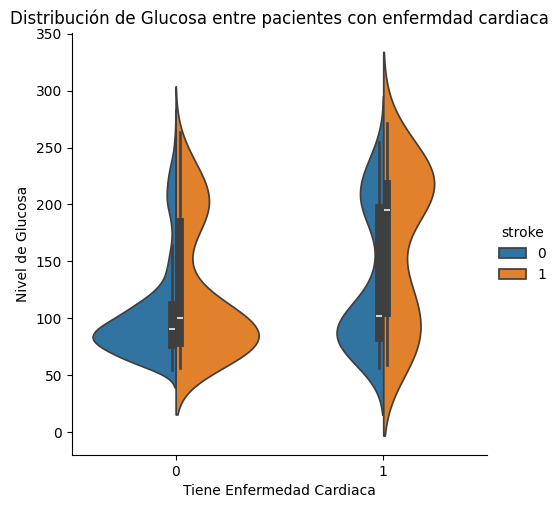

In [17]:
ax = sns.catplot(data=df, kind='violin', x='heart_disease', y='avg_glucose_level', hue='stroke', split=True)
ax.set(xlabel='Tiene Enfermedad Cardiaca', ylabel='Nivel de Glucosa', title='Distribución de Glucosa entre pacientes con enfermdad cardiaca')

En el grafico de violin podemos ver desde otro angulo la distribucion de pacientes con STROKE en especial los que no tienen enfermedad cardiaca que tienen menor nivel de Glucosa, es decir son mas saludables mientras que en los pacientees que tienen enfermedad cardiaca notamos mayot nivel de glucosa y una mayor presencia de pacientes con STROKE

### Hipotesis: Existe una relacion de menor bmi y menor nivel de glucosa dependiendo en pacientes que trabajan con relacion a niños

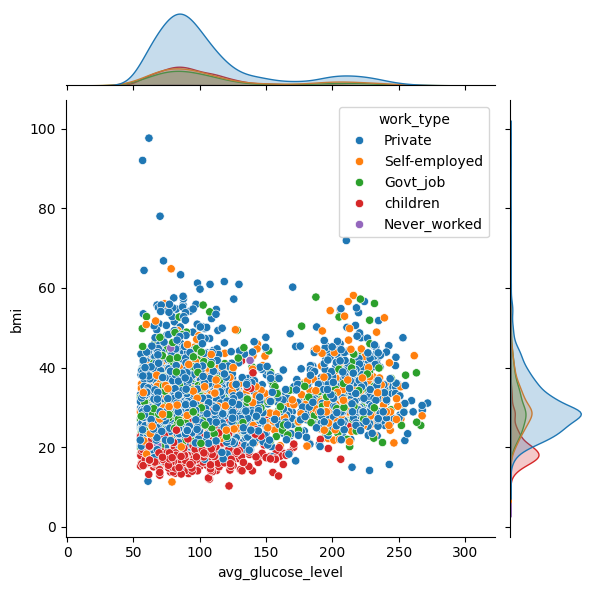

In [18]:
sns.jointplot(x='avg_glucose_level', y='bmi',data=df, hue='work_type');

# iv) EDA - Exploratory Data Analysis

In [19]:
serie_trabajos = df.work_type.value_counts()  # obtenemos la frecuencia de pacientes que tienen un determinado tipo de trabajo
serie_trabajos

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Text(0.5, 0, 'Tipo trabajos')

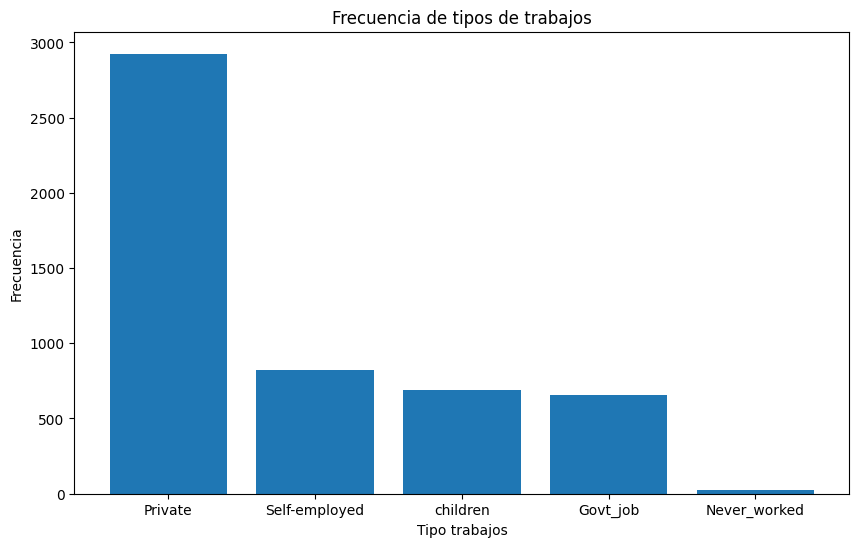

In [20]:
fig, ax = plt.subplots(figsize=(10,6))  # realizamos un barchar para los tipos de trabajo de los pacientes
ax.bar(serie_trabajos.index, serie_trabajos)
ax.set_title('Frecuencia de tipos de trabajos')
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Tipo trabajos')

Identificamos que hay casi 3000 pacientes cuyo trabajo es Privado y que representa casi un 6o% de todos los pacientes mientras que los que Nunca han trabajado es un numero muy reducido

In [21]:
df.head()  # revisamos las variables disponibles y elegimos las variables birth_year y id pàra crear una seria de tiempo para graficar cuantos pacientes han nacido en en los años

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,birth_year,tercera_edad,bmi_descripcion
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1956,Yes,Obesdad Severa
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,1962,Yes,Sobre Peso
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1943,Yes,Obesdad Severa
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1974,No,Obesdad Severa
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1944,Yes,Ideal


In [22]:
df2 = df.groupby("birth_year")["id"].count().reset_index(name='counts')
df2

,birth_year,counts
0,1941,56
1,1942,60
2,1943,70
3,1944,85
4,1945,102
...,...,...
77,2018,65
78,2019,34
79,2020,46
80,2021,127


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   birth_year  82 non-null     int64
 1   counts      82 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


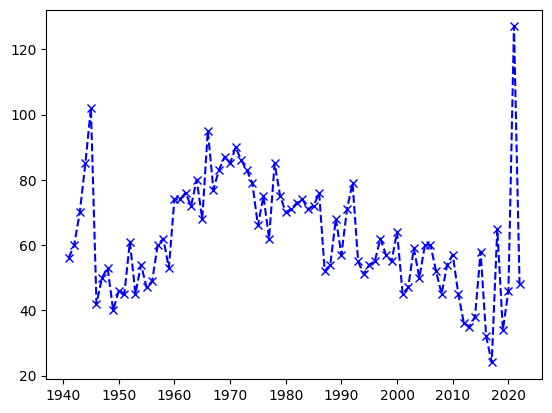

In [24]:
fig, ax = plt.subplots()
ax.plot(df2.birth_year, df2.counts,'bx--') #exploramos y analizamos la información con un grafico de lineas

Podemos ver que tenemos una frecuencia sostenido  de pacientes nacidos entre 1960 y 1980... asi como tenemos un poco irregular en 2020

Text(0, 0.5, 'Glucosa')

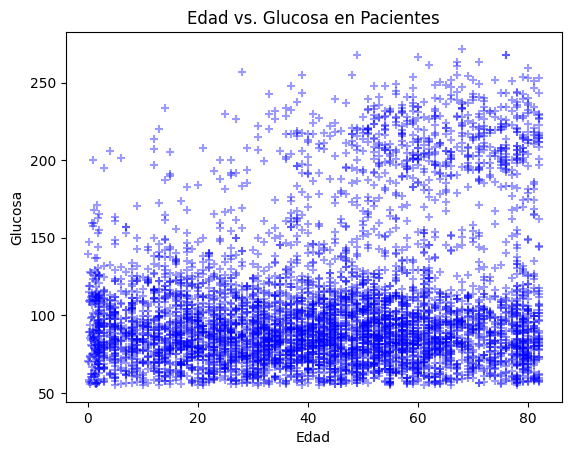

In [25]:
fig, ax = plt.subplots()
ax.scatter(df.age, df.avg_glucose_level, alpha=0.4,color='b',marker='+')
ax.set_title('Edad vs. Glucosa en Pacientes')
ax.set_xlabel('Edad')
ax.set_ylabel('Glucosa')

Podemos visualizar que hay mayor nivel de glocusa a medida que pasamos la edad de 40 años

### Visualizacion de Datos con Seaborn (sns)

1) vamos a realizar graficos analizando las distrubuciones respecto a nuestra variable Clasificadora STROKE


<Axes: xlabel='avg_glucose_level', ylabel='Count'>

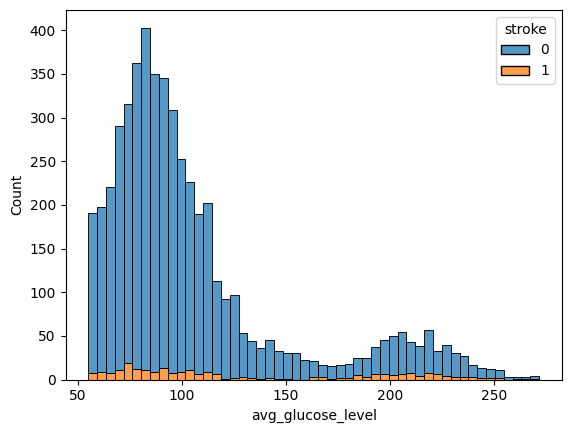

In [26]:
sns.histplot(data=df, x="avg_glucose_level", hue="stroke", multiple="stack")

Podemos verificar que hay una mayor cantidad de pacientes sin Stroke y que la mayoria tiene un nivel de glucosa entre 50 y 100

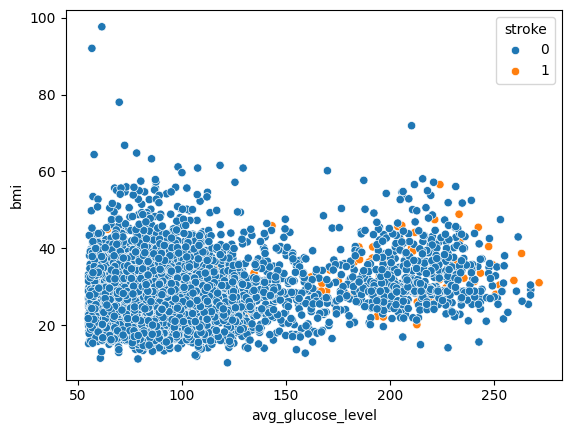

In [27]:
stroke = df
g = sns.scatterplot(data=stroke, x="avg_glucose_level", y="bmi", hue="stroke")

Con el scarter plot podemos apreciar dos subconjuntos marcados con una separacion similar al grafico anterior con el nivel de glucosa. Pero una mayor concentracion de pacientes con STROKE=1 con el nivel de glucosa por encima de 150

2) Graficos de Analisis entre distintas variables

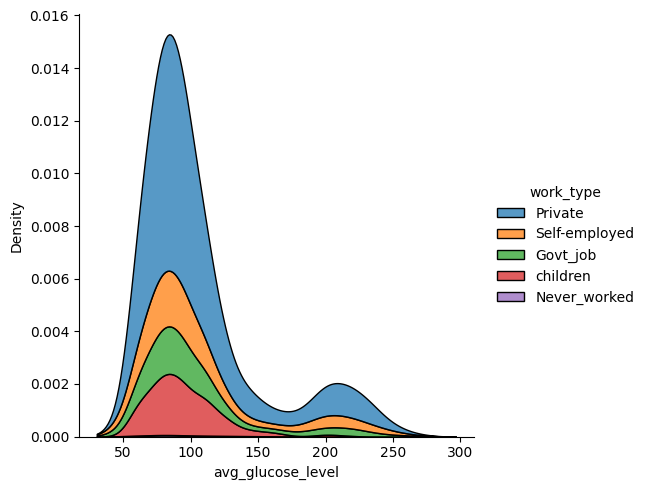

In [28]:
sns.displot(data=df, x="avg_glucose_level", hue="work_type", multiple='stack', kind="kde")

Podemos notar una mayor presencia de pacientes con un tipo de Trabajo Privado

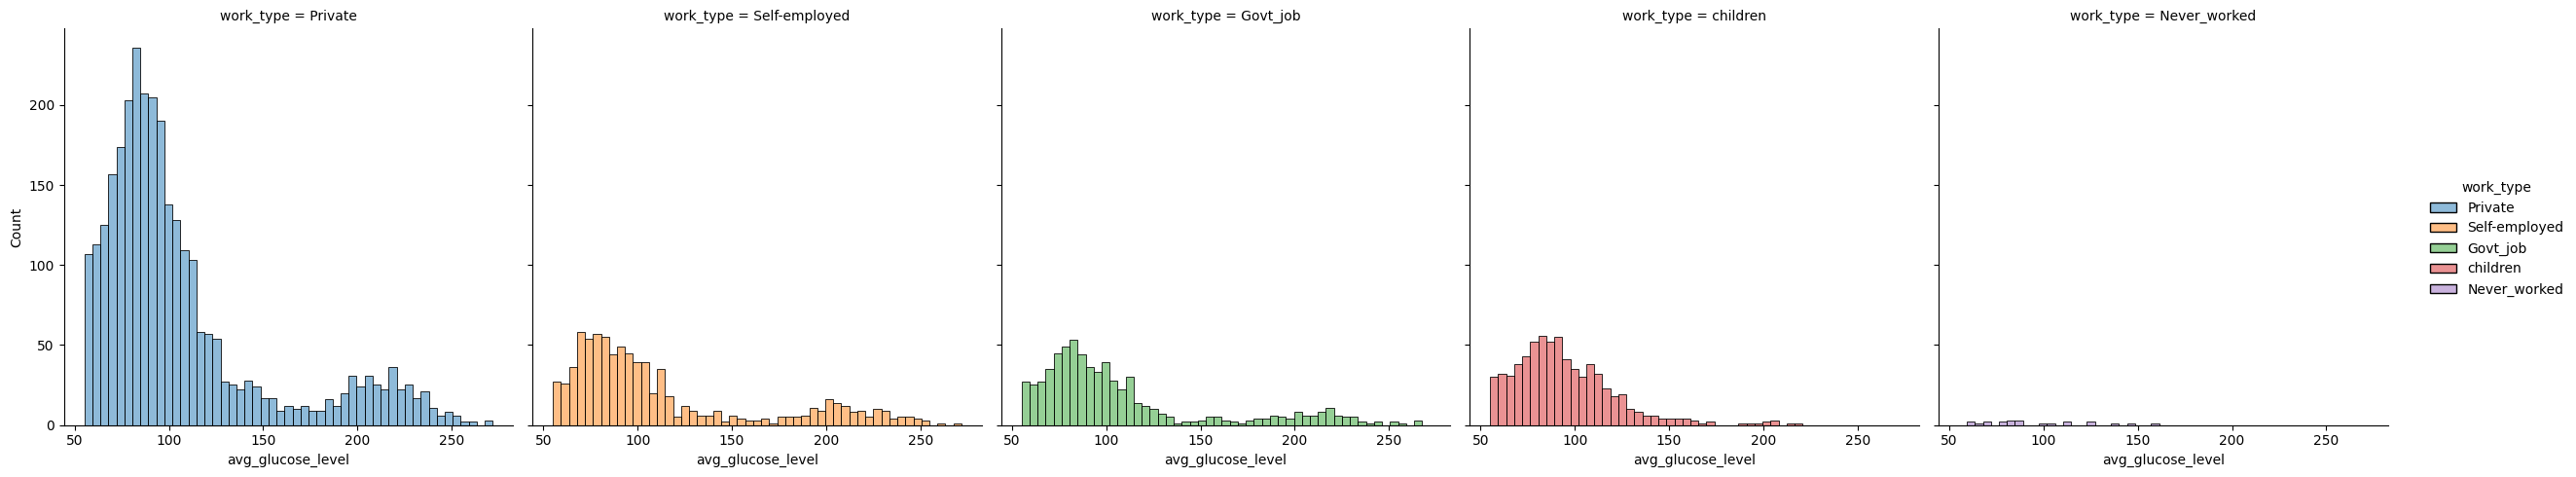

In [29]:
sns.displot(data=df, x="avg_glucose_level", hue="work_type", col="work_type")

Vemos el grafico anterior dividido en columnas y en grafico de distribucion donde apreciamos mejor que work type tiene una mayor frecuencia de 50 a 100

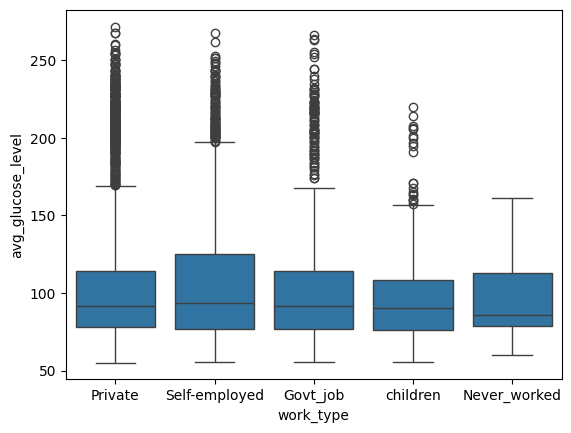

In [30]:
ax = sns.boxplot(x="work_type", y="avg_glucose_level", data=df)

En el grafico de bloxplot apreciamos que lo empleados autonomos tienen una mayor varianza respecto al nivel de glucosa y que los que no han trabado no tienen casos extremos de glucosa

<Axes: xlabel='gender', ylabel='bmi'>

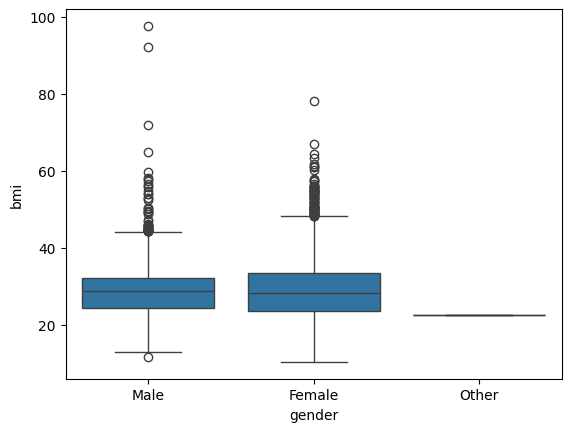

In [31]:
sns.boxplot(x=df['gender'],y=df['bmi'])

se puede observar que hay mas varianza en el genero femenino respecto al bmi, tambien que hay datos outlier de hombres que llegan a tener el mayor bmi, por otro lado, analizando los cuartiles del genero femenino, nos dice que el genero presenta mayor y menor bmi que el genero masculino 


#### Dividimos en variables categoricas y continuas

Creamos dos columnas, una columna con variables continuas como año, nivel de glucosa promedio y bmi, y luego creamos una columna con variables categoricas que no sean id ni stroke y tampoco esten en la columna de variables continuas

In [32]:
con_cols=['age','avg_glucose_level','bmi']
cat_cols=[]
for i in df.columns:
    if i!='id' and i!='stroke' and i not in con_cols:
        cat_cols.append(i)
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'birth_year',
 'tercera_edad',
 'bmi_descripcion']

In [33]:
df.drop(index = df[df['gender']=='Other'].index[0] ,axis=0,inplace=True) #Eliminamos el dato de "other" que tenemos en la columna de genero, ya que este no nos sirve

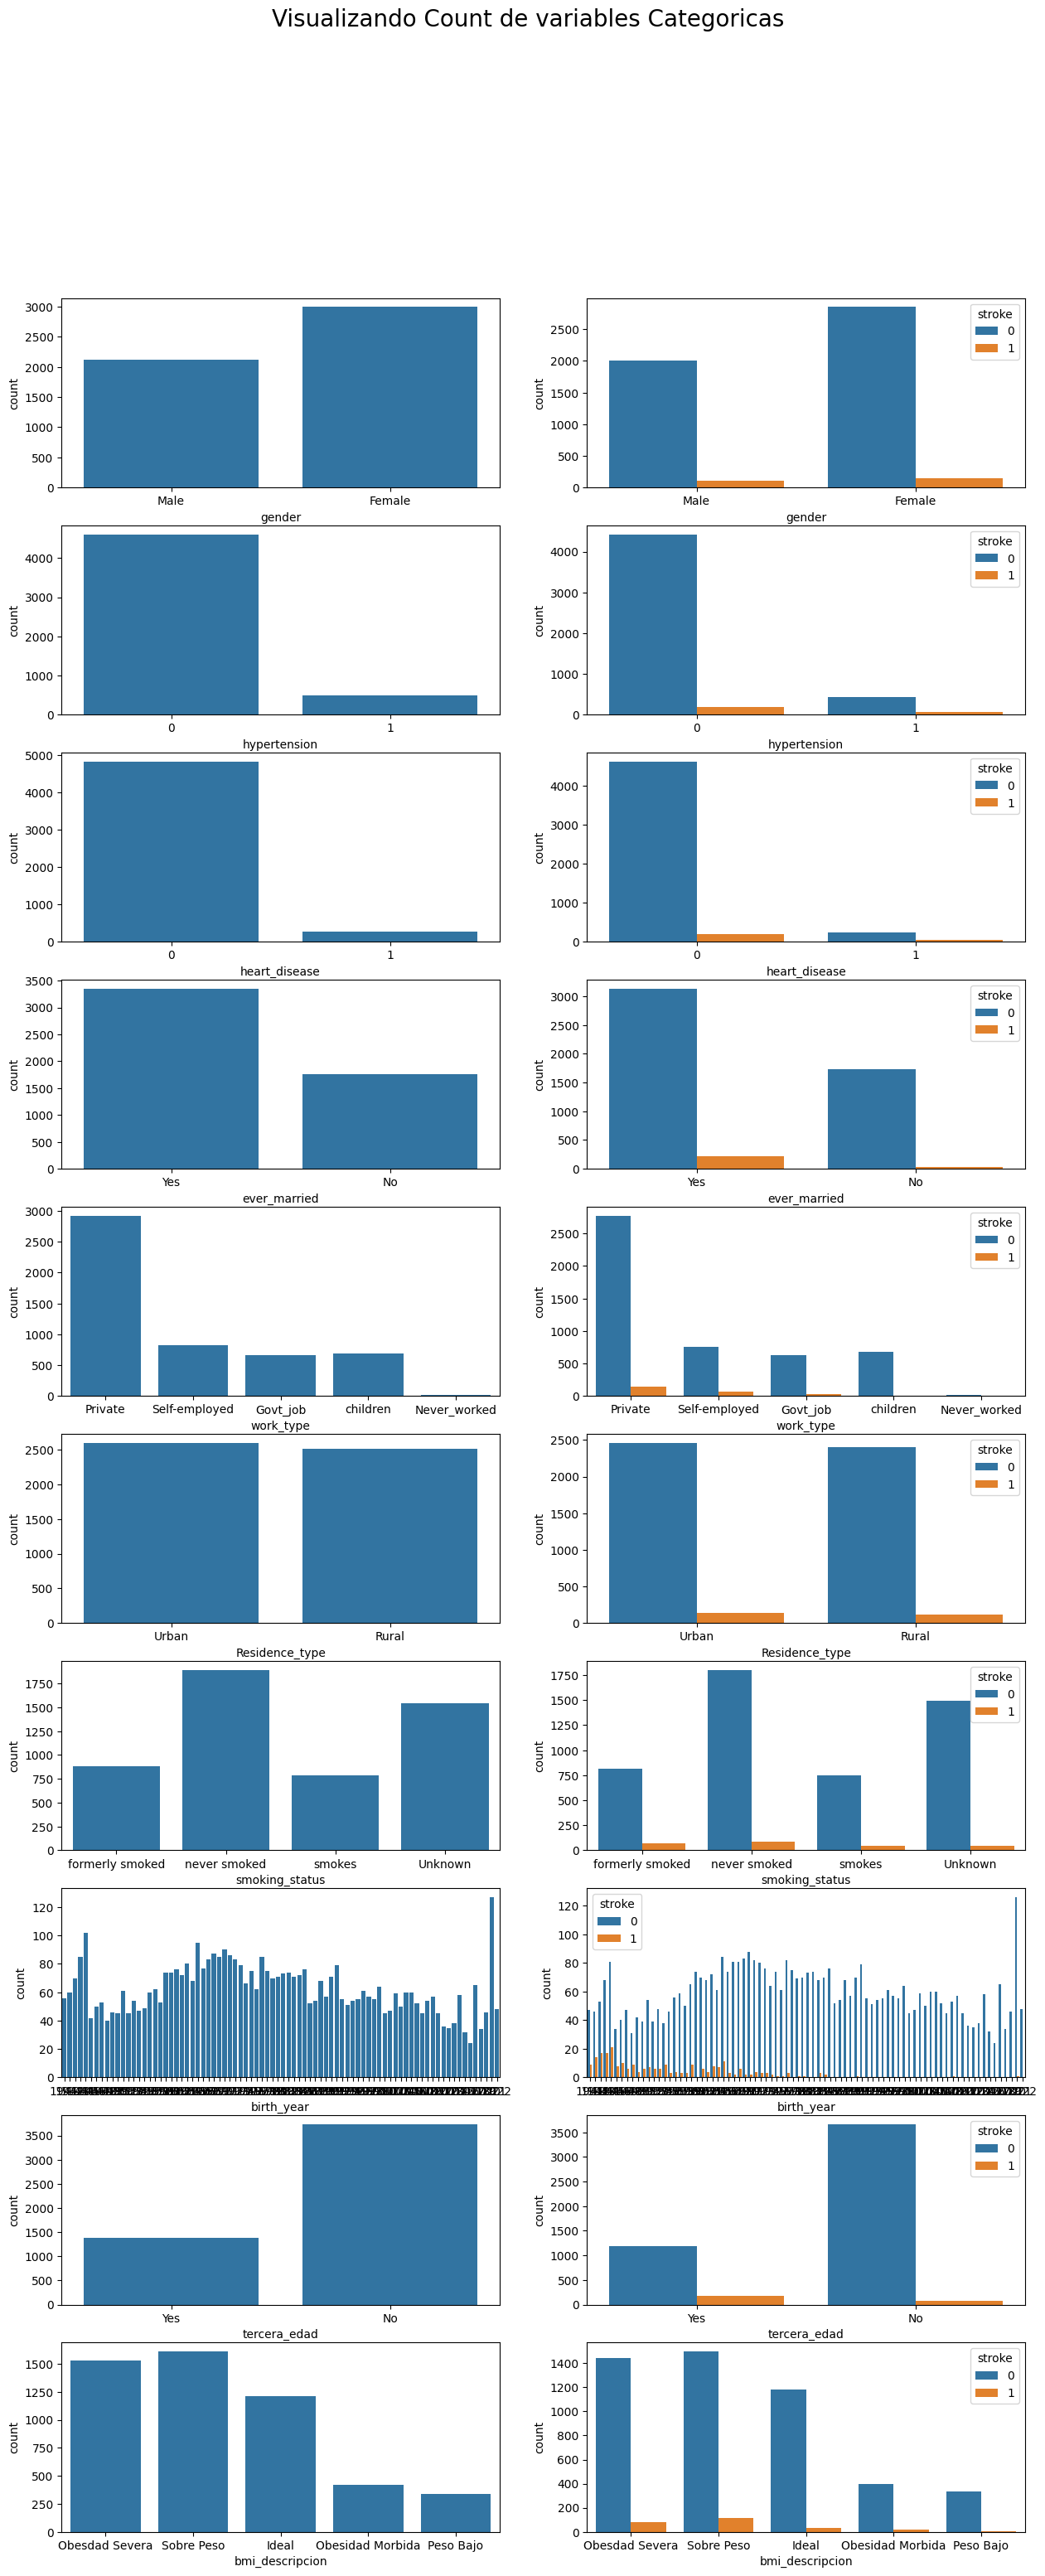

In [34]:
fig,ax=plt.subplots(10,2,figsize=(15,35))
for index,i in enumerate(cat_cols):
    plt.suptitle("Visualizando Count de variables Categoricas",size=20)
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='stroke')

Generamos una matriz de gráficos de barras para visualizar la distribución de las variables categóricas en el conjunto de datos y cómo esta distribución varía en función de la variable "stroke". Esto puede ayudar a comprender la relación entre las variables categóricas y la ocurrencia de accidentes cerebrovasculares ("stroke").

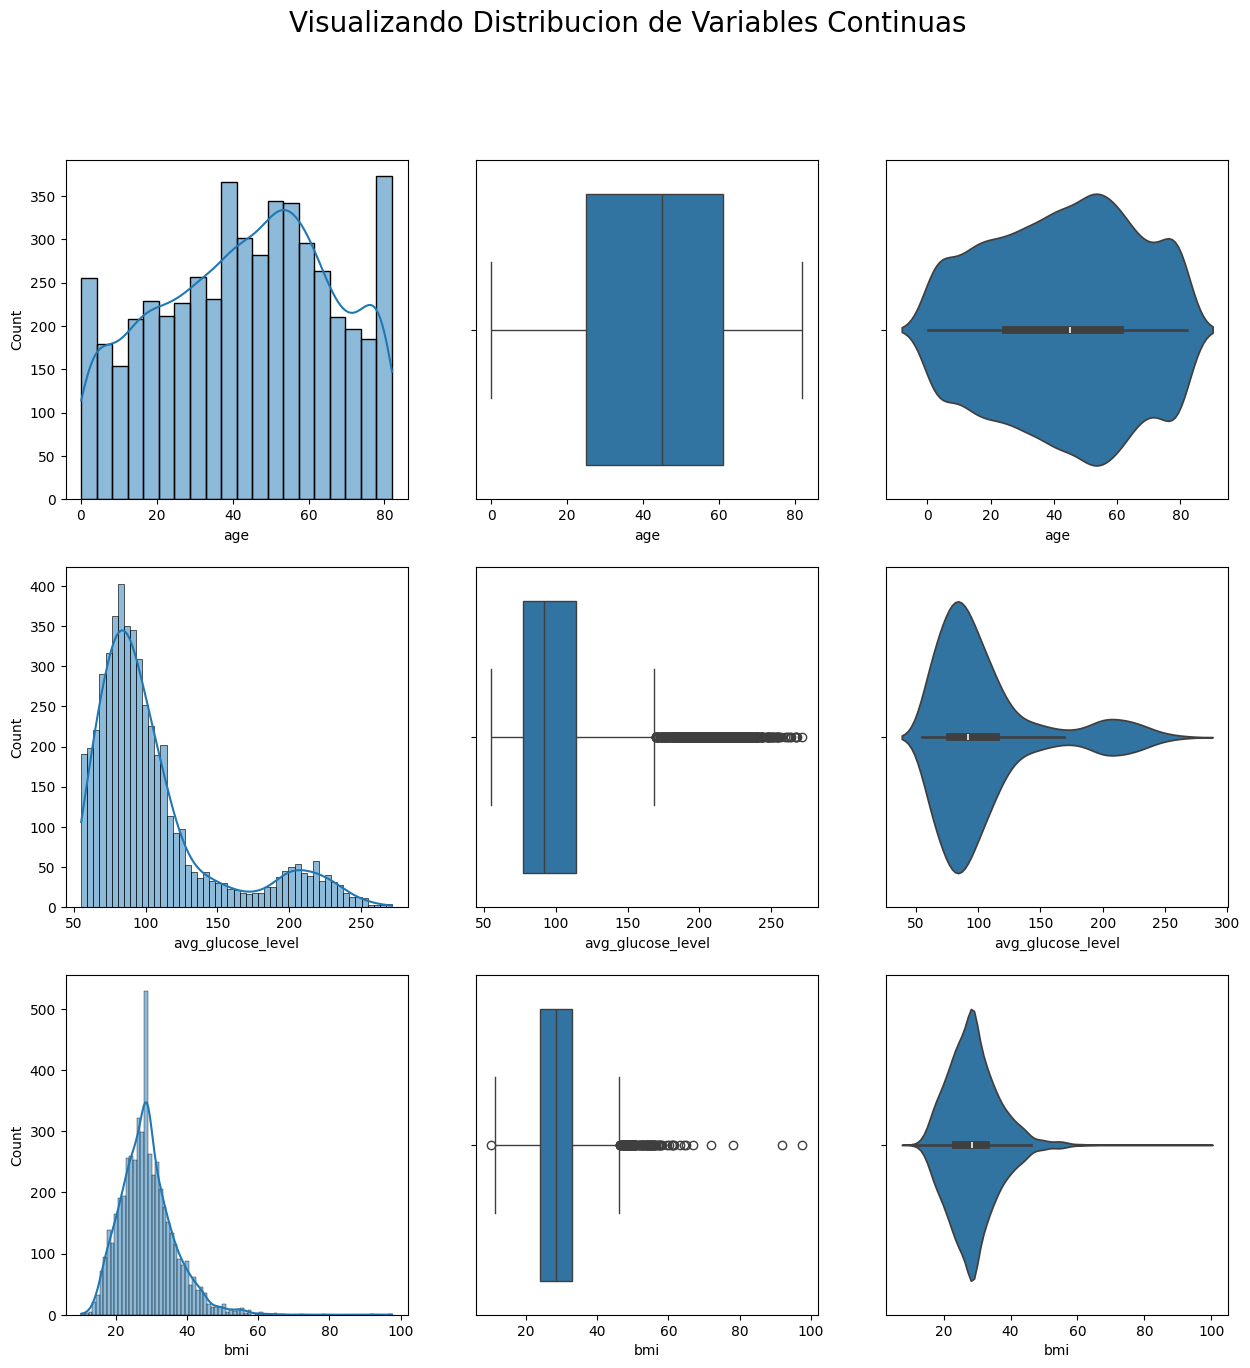

In [46]:
#realizamos la misma matriz de graficos para visualizar la distribucion de las variables continuas
fig,ax=plt.subplots(3,3,figsize=(15,15))
for index,i in enumerate(con_cols):
    plt.suptitle("Visualizando Distribucion de Variables Continuas",size=20)
    sns.histplot(df[i],ax=ax[index,0], kde=True)
    sns.boxplot(data=df,x=i,ax=ax[index,1])
    sns.violinplot(data=df,x=i,ax=ax[index,2])


Generamos una matriz de gráficos de barras para visualizar la distribución de las variables continuas en el conjunto de datos.